# Lab 3 - Hopfield Networks

**Imports**

In [107]:
%load_ext autoreload
%autoreload 2

from ann_lab3_utils import Hopfield_Network

import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from random import randrange

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
data_set_path = '/Users/brenoaberle/Documents/KTH/Artificial_Neural_Networks_and_Deep_Architectures/Assignments/Lab3/'

## 3.1 Convergence and attractors

Create three memory patterns:

In [109]:
# Create memory patterns
x1 = np.array([[-1,-1, 1,-1, 1,-1,-1, 1]])
x2 = np.array([[-1,-1,-1,-1,-1, 1,-1,-1]])
x3 = np.array([[-1, 1, 1,-1,-1, 1,-1, 1]])
x = np.vstack((x1,x2,x3))

---
Create Hopfield Network and create weights with all patterns:

In [110]:
hopfield_net = Hopfield_Network()
hopfield_net.fit(x)

---
Check if the network was able to store all three patterns:

- Yes, the network was able to store all three patterns, since we applied the recall method on all pattern and input equals output (recall).

In [111]:
recall1 = hopfield_net.recall(x1,num_updates=1)
recall2 = hopfield_net.recall(x2,num_updates=1)
recall3 = hopfield_net.recall(x3,num_updates=1)

print(np.array_equal(x1, recall1))
print(np.array_equal(x2, recall2))
print(np.array_equal(x3, recall3))

True
True
True


---
Distorted versions of the original patterns:

In [112]:
x1d = np.array([[1,-1, 1,-1, 1,-1,-1, 1]]) # 1 bit error
x2d = np.array([[1, 1,-1,-1,-1, 1,-1,-1]]) # 2 bit error
x3d = np.array([[1, 1, 1,-1, 1, 1,-1, 1]]) # 3 bit error

---
Apply the update rule repeatedly until you reach a stable fixed point. Did
all the patterns converge towards stored patterns?

- x1d converged to x1 after one update iteration
- After 10 update iterations: x2d is jumping back and forth between the following two patterns which are non of the original three. Hence, x2d doesn't converge: <br>
[[-1. -1. -1.  1. -1.  1.  1. -1.]] <br>
[[ 1.  1. -1. -1. -1.  1. -1. -1.]]
- After 10 update iterations: x3d is jumping back and forth between the following two patterns which are non of the original three. Hence, x3d doesn't converge: <br>
[[-1. -1.  1. -1. -1. -1. -1.  1.]] <br>
[[-1. -1.  1. -1.  1.  1. -1.  1.]]

In [113]:
recall_dist1 = hopfield_net.recall(x1d,num_updates=1)
print("Recall x1d: ",recall_dist1)

recall_dist2 = hopfield_net.recall(x2d,num_updates=10)
print("Recall x2d: ",recall_dist2)

recall_dist3 = hopfield_net.recall(x3d,num_updates=10)
print("Recall x3d: ",recall_dist3)

Recall x1d:  [[-1. -1.  1. -1.  1. -1. -1.  1.]]
Recall x2d:  [[ 1.  1. -1. -1. -1.  1. -1. -1.]]
Recall x3d:  [[-1. -1.  1. -1.  1.  1. -1.  1.]]


---
How many attractors are there in this network? Hint: automate the
searching.

- Approach: Create all possible constellations of an 8 bit long array with values -1 and 1 (permutation) --> calculate recalls --> of all outputs determine unique outputs
- An binary array with 8 bits can generate $2^8 = 256$ different permutations
- In total: 64 attractors

In [420]:
all_permutations = list(itertools.product([-1, 1], repeat=8)) # create all permutations
all_permutations = [np.array(x).reshape(1,8) for x in all_permutations] # transform all entries into numpy.arrays

outputs = []


for permutation in all_permutations: # calculate the recalls for all permutations
    permutation = hopfield_net.recall(permutation,num_updates=100)
    outputs.append(permutation)
    #output = hopfield_net.recall(permutation,num_updates=1)
    #output = hopfield_net.recall(output,num_updates=100)
    #outputs.append(output)
    
unique_outputs = np.unique(outputs, axis=0)
print("Total amount of attractors equals number of unique outputs: ",len(unique_outputs))


Total amount of attractors equals number of unique outputs:  64


---
What happens when you make the starting pattern even more dissimilar
to the stored ones (e.g. more than half is wrong)?

- With a pattern that is distorted more than 50 % than the original, the recall algorithm jumps also back and forth between two not trained patterns

In [375]:
x2_distorted = np.array([[1,1,1,-1,1,-1,-1,1]])
recall_x2_distorted = hopfield_net.recall(x2_distorted,num_updates=30)
print(recall_x2_distorted)

[[ 1.  1.  1. -1.  1. -1. -1.  1.]]


## 3.2 Sequential Update

Load dataset and create dataframe.
Patterns p1,...,p9.
p10: degraded version of p1.
p11: mixture of p2 and p3

In [387]:
values = pd.read_csv(data_set_path + 'pict.dat', 
                 sep=",", 
                 header=None).values.reshape((11,1024))

df_pict = pd.DataFrame(values, index = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11'])
df_pict.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
p1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,-1,-1
p2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
p3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
p4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
p5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


---
Check that the first three patterns are stable

- The three patterns are stable

In [392]:
p1 = df_pict.loc['p1'].values.reshape((1,1024))
p2 = df_pict.loc['p2'].values.reshape((1,1024))
p3 = df_pict.loc['p3'].values.reshape((1,1024))
p4 = df_pict.loc['p4'].values.reshape((1,1024))
p5 = df_pict.loc['p5'].values.reshape((1,1024))
p6 = df_pict.loc['p6'].values.reshape((1,1024))
p7 = df_pict.loc['p7'].values.reshape((1,1024))
p8 = df_pict.loc['p8'].values.reshape((1,1024))
p9 = df_pict.loc['p9'].values.reshape((1,1024))
p10 = df_pict.loc['p10'].values.reshape((1,1024))
p11 = df_pict.loc['p11'].values.reshape((1,1024))

pict_123 = np.vstack((p1,p2,p3))

hopfield_net_pict = Hopfield_Network()
hopfield_net_pict.fit(pict_123) # give first three patterns

In [393]:
recall_p1 = hopfield_net_pict.recall(p1,num_updates=1)
recall_p2 = hopfield_net_pict.recall(p2,num_updates=1)
recall_p3 = hopfield_net_pict.recall(p3,num_updates=1)

print(np.array_equal(recall_p1, p1))
print(np.array_equal(recall_p2, p2))
print(np.array_equal(recall_p3, p3))

True
True
True


---
Can the network complete a degraded pattern? Try the pattern p10, which
is a degraded version of p1, or p11 which is a mixture of p2 and p3:

- p10: can be restored to p1
- p11: can't be restored to either p2 or p3 --> doesn't converge

Pattern p1 (original) and p10 (distortion of p1):


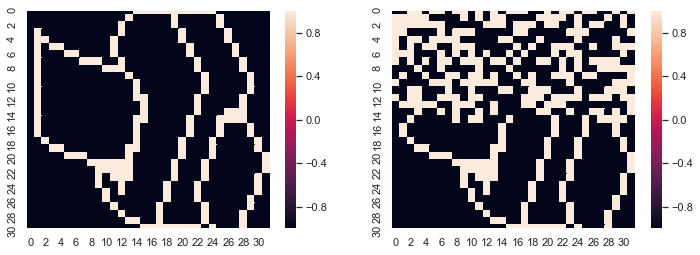

In [394]:
p1_img = p1[0].reshape((32,32))
p2_img = p2[0].reshape((32,32))
p3_img = p3[0].reshape((32,32))
p10_img = p10[0].reshape((32,32))
p11_img = p11[0].reshape((32,32))

print("Pattern p1 (original) and p10 (distortion of p1):")
f, axes = plt.subplots(1, 2)
f.set_figheight(4)
f.set_figwidth(12)
sns.heatmap(p1_img, ax=axes[0])
sns.heatmap(p10_img, ax=axes[1])

Pattern p10 (distortion of p1) after recall (batch):


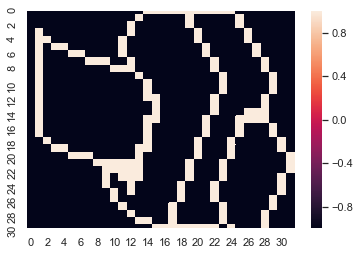

In [395]:
p10_recall = hopfield_net_pict.recall(p10,num_updates=1)
p10_recall_img = p10_recall[0].reshape((32,32))

print("Pattern p10 (distortion of p1) after recall (batch):")
sns.heatmap(p10_recall_img)

Pattern p2 (original), p3 (original), p11 (distorted: mixture of p2 and p3):


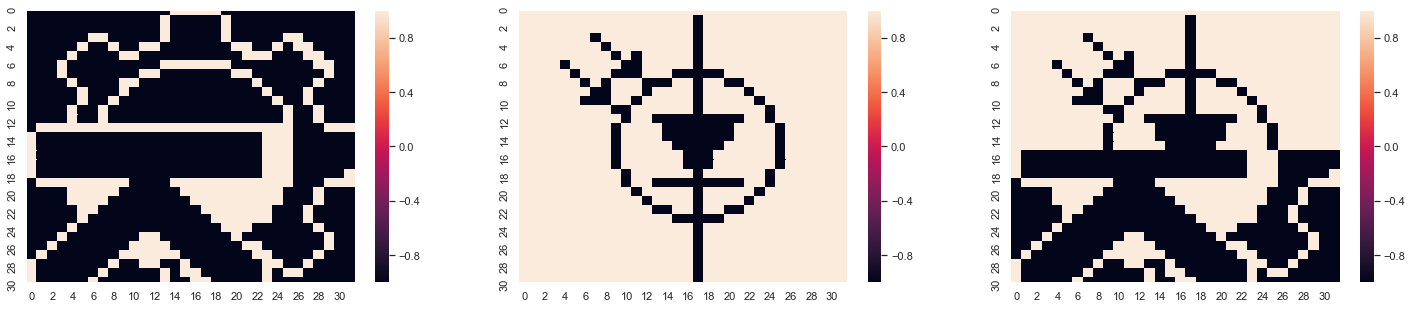

In [396]:
print("Pattern p2 (original), p3 (original), p11 (distorted: mixture of p2 and p3):")

f, axes = plt.subplots(1, 3)
f.set_figheight(5)
f.set_figwidth(25)
sns.heatmap(p2_img, ax=axes[0])
sns.heatmap(p3_img, ax=axes[1])
sns.heatmap(p11_img, ax=axes[2])

Pattern p11 (distortion of p2 and p3) after recall (batch):


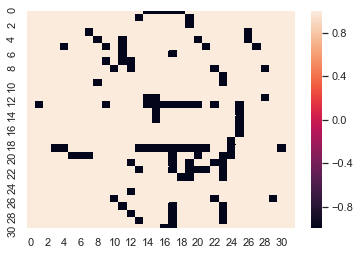

In [400]:
p11_recall = hopfield_net_pict.recall(p11,num_updates=15)
p11_recall_img = p11_recall[0].reshape((32,32))

print("Pattern p11 (distortion of p2 and p3) after recall (batch):")
sns.heatmap(p11_recall_img)

---
Clearly convergence is practically instantaneous. What happens if we
select units randomly? Please calculate their new state and then repeat the
process in the spirit of the original sequential Hopfield dynamics. Please
demonstrate the image every hundredth iteration or so.

- p10: Converges
- p11: Converges
- Both distorted patterns converge, but require a lot iterations (>3000), since units get picked randomly

Pattern p10 (distortion of p1) after recall (sequential):


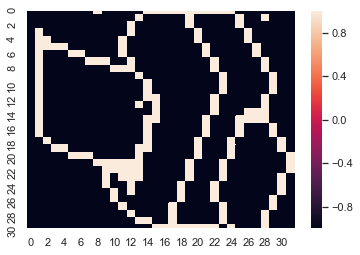

In [401]:
p10_recall_seq = hopfield_net_pict.recall_sequential_random(p10,num_updates=4000)
p10_recall_seq_img = p10_recall_seq[0].reshape((32,32))
#print(np.array_equal(p10_recall_seq,p10))

print("Pattern p10 (distortion of p1) after recall (sequential):")
sns.heatmap(p10_recall_seq_img)

Pattern p11 (distortion of p2 and p3) after recall (sequential):


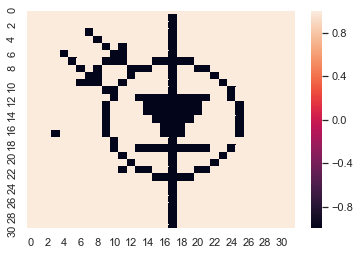

In [402]:
p11_recall_seq = hopfield_net_pict.recall_sequential_random(p11,num_updates=5000)
p11_recall_seq_img = p11_recall_seq[0].reshape((32,32))

print("Pattern p11 (distortion of p2 and p3) after recall (sequential):")
sns.heatmap(p11_recall_seq_img)

## 3.3 Energy

What is the energy at the different attractors?

- Energy at attractor p1: -1436.390625
- Energy at attractor p2: -1362.640625
- Energy at attractor p3: -1459.25

In [125]:
hopfield_net_energy = Hopfield_Network()
hopfield_net_energy.fit(pict_123) # give first three patterns

In [130]:
energy_p1 = hopfield_net_energy.energy_function(p1)
energy_p2 = hopfield_net_energy.energy_function(p2)
energy_p3 = hopfield_net_energy.energy_function(p3)

print("Energy p1: ",energy_p1)
print("Energy p2: ",energy_p2)
print("Energy p3: ",energy_p3)

Energy p1:  -1436.390625
Energy p2:  -1362.640625
Energy p3:  -1459.25


---
What is the energy at the points of the distorted patterns?

- Energy at attractor p10: -412.98046875
- Energy at attractor p11: -170.5

In [131]:
energy_p10 = hopfield_net_energy.energy_function(p10)
energy_p11 = hopfield_net_energy.energy_function(p11)

print("Energy p10: ",energy_p10)
print("Energy p11: ",energy_p11)

Energy p10:  -412.98046875
Energy p11:  -170.5


---
Follow how the energy changes from iteration to iteration when you use
the sequential update rule to approach an attractor.

- The energy steadily decreases from -412.98 (iter=0) to -1412.16 (iter=1000)

Pattern p10 (distortion of p1) after recall (sequential):
[-412.98046875, -509.578125, -581.35546875, -644.890625, -739.421875, -811.71875, -888.26171875, -979.88671875, -1140.01171875, -1271.76171875, -1412.16796875, -1436.390625, -1436.390625, -1436.390625]


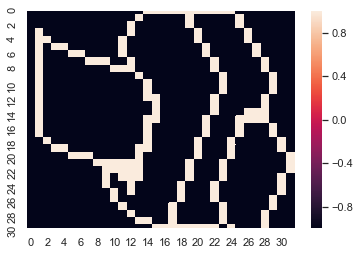

In [142]:
p10_recall_seq_det, energy_progress = hopfield_net_energy.recall_sequential_determined(p10,num_updates=1400, ordering="shuffled")
p10_recall_seq_det_img = p10_recall_seq_det[0].reshape((32,32))

print("Pattern p10 (distortion of p1) after recall (sequential):")
sns.heatmap(p10_recall_seq_det_img)
print(energy_progress)

Progress of energy after every 100 iteration:


Text(0.5, 1.0, 'Progress of energy function')

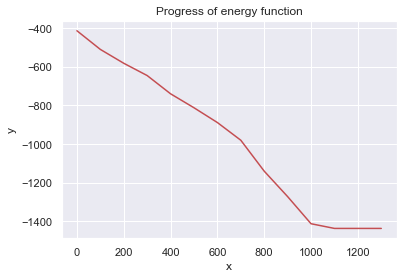

In [144]:
print("Progress of energy after every 100 iteration:")
x_axis = np.arange(0, 1400, 100)
y_axis = energy_progress

plt.plot(x_axis, y_axis,'r', label="energy function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Progress of energy function")
#plt.legend()

---
Generate a weight matrix by setting the weights to normally distributed
random numbers, and try iterating an arbitrary starting state. What
happens?

- The network doesn't converge. The energy is jumping back and forth.

In [180]:
weight_matrix_asym = np.random.normal(0,1,(p1.shape[1],p1.shape[1]))
weight_matrix_sym = 0.5 * (weight_matrix_asym + weight_matrix_asym.T)

for i in range(len(p1[0])): # set the diagonal to zero
    weight_matrix_asym[i][i] = 0
    weight_matrix_sym[i][i] = 0

In [181]:
hopfield_net_manual_weights_asym = Hopfield_Network(weight_matrix_asym) # Not fit() because we set the weights manually

Pattern p10 (distortion of p1) after recall (sequential) with manually set asymmetric weights:


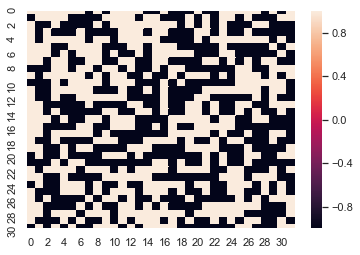

In [182]:
p10_recall, energy_progress = hopfield_net_manual_weights_asym.recall_sequential_determined(p10,num_updates=4000)
p10_recall_img = p10_recall[0].reshape((32,32))

print("Pattern p10 (distortion of p1) after recall (sequential) with manually set asymmetric weights:")
sns.heatmap(p10_recall_img)
#print(energy_progress)

Progress of energy after every 100 iteration:


Text(0.5, 1.0, 'Progress of energy function')

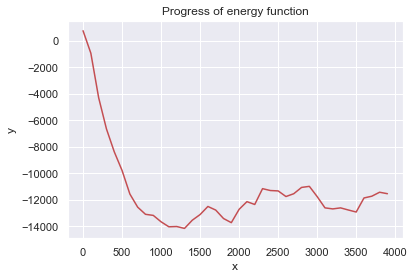

In [183]:
print("Progress of energy after every 100 iteration:")
x_axis = np.arange(0, 4000, 100)
y_axis = energy_progress

plt.plot(x_axis, y_axis,'r', label="energy function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Progress of energy function")
#plt.legend()

---
Make the weight matrix symmetric (e.g. by setting w=0.5*(w+w')). What
happens now? Why?

- The network converges, since the energy is converging

In [184]:
hopfield_net_manual_weights_sym = Hopfield_Network(weight_matrix_sym) # Not fit() because we set the weights manually

Pattern p10 (distortion of p1) after recall (sequential) with manually set symmetric weights:


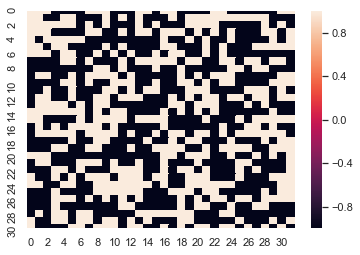

In [185]:
p10_recall, energy_progress = hopfield_net_manual_weights_sym.recall_sequential_determined(p10,num_updates=4000)
p10_recall_img = p10_recall[0].reshape((32,32))

print("Pattern p10 (distortion of p1) after recall (sequential) with manually set symmetric weights:")
sns.heatmap(p10_recall_img)
#print(energy_progress)

Progress of energy after every 100 iteration:


Text(0.5, 1.0, 'Progress of energy function')

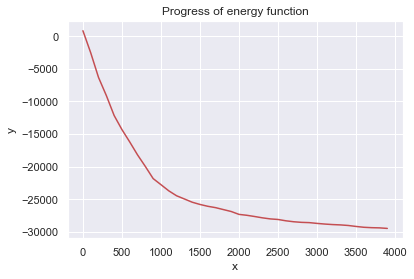

In [186]:
print("Progress of energy after every 100 iteration:")
x_axis = np.arange(0, 4000, 100)
y_axis = energy_progress

plt.plot(x_axis, y_axis,'r', label="energy function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Progress of energy function")
#plt.legend()

## 3.4 Distortion Resistance

How much noise can be removed?

- We distorted p1. Since we flip binary values we kind of mirror at flipping_ratio=0.5. So flipping_ratio=0.3 is like flipping_ratio=0.7 but just opposite values.
- Almost up to flipping_ratio=0.25 the noise could be removed

In [403]:
hopfield_net_dist = Hopfield_Network()
hopfield_net_dist.fit(pict_123)

Distorted picture:


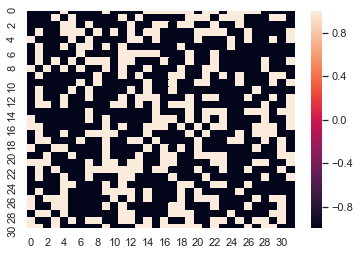

In [412]:
# Create distorted patterns by yourself:
p1_dist = hopfield_net_dist.create_distortion(p1,flipping_ratio=0.3)
p1_dist_img = p1_dist[0].reshape((32,32))

# Calculate distortion ratio
dist_ratio = hopfield_net_dist.calculate_distortion_ratio(p1,p1_dist)

print("Distorted picture:")
sns.heatmap(p1_dist_img)


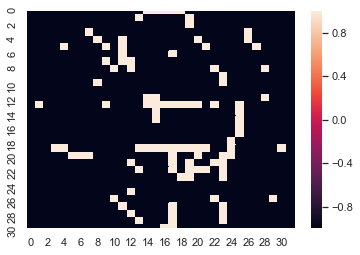

In [413]:
p1_dist_recall = hopfield_net_dist.recall(p1_dist,num_updates=1)
p1_dist_recall_img = p1_dist_recall[0].reshape((32,32))

sns.heatmap(p1_dist_recall_img)

---
Is there any difference between the three attractors with regard to noise
tolerance?

- p1: up to flipping_ratio=0.25
- p2: up to flipping_ratio=0.42
- p3: up to flipping_ratio=0.46

In [414]:
# Create distorted patterns by yourself:
p2_dist = hopfield_net_dist.create_distortion(p2,flipping_ratio=0.42)
p3_dist = hopfield_net_dist.create_distortion(p3,flipping_ratio=0.48)

p2_dist_img = p2_dist[0].reshape((32,32))
p3_dist_img = p3_dist[0].reshape((32,32))

Pattern p10 (distortion of p1) after recall (batch):


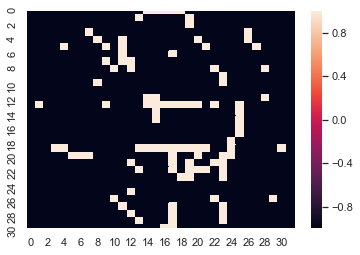

In [415]:
p2_dist_recall = hopfield_net_dist.recall(p2_dist,num_updates=1)
p2_dist_recall_img = p2_dist_recall[0].reshape((32,32))

print("Pattern p10 (distortion of p1) after recall (batch):")
sns.heatmap(p2_dist_recall_img)

Pattern p10 (distortion of p1) after recall (batch):


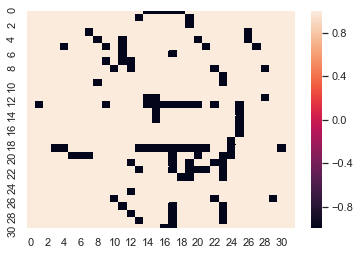

In [418]:
p3_dist_recall = hopfield_net_dist.recall(p3_dist,num_updates=100)
p3_dist_recall_img = p3_dist_recall[0].reshape((32,32))

print("Pattern p10 (distortion of p1) after recall (batch):")
sns.heatmap(p3_dist_recall_img)

---
Does the network always converge to the right attractor? Do the extra
iterations (beyond a single-step recall) help? Do you notice any other
attractors?

- No, the network does not always converge to the right attractor.
- Network converges to not trained patterns.
- Extra iterations doesn't help

## 3.5 Capacity

How many patterns could safely be stored? Was the drop in performance
gradual or abrupt?

- 3 can be stored safely
- with 4 it already doesn't converge and see the misclassification
- with more added patterns it gets more and more worse

In [363]:
hopfield_net_cap = Hopfield_Network()

pict_merge = np.vstack((p1,p2,p3,p4,p5,p6))

hopfield_net_cap.fit(pict_merge)

Distorted picture:


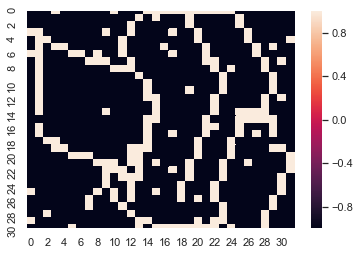

In [364]:
p1_dist = hopfield_net_cap.create_distortion(p1,flipping_ratio=0.05)
p1_dist_img = p1_dist[0].reshape((32,32))

print("Distorted picture:")
sns.heatmap(p1_dist_img)

Pattern after recall (batch):


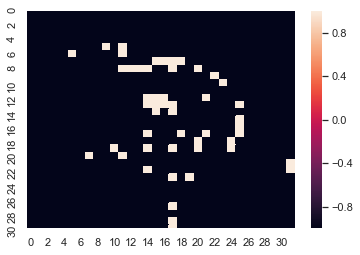

In [365]:
p1_dist_recall = hopfield_net_cap.recall(p1_dist,num_updates=2)
p1_dist_recall_img = p1_dist_recall[0].reshape((32,32))

print("Pattern after recall (batch):")
sns.heatmap(p1_dist_recall_img)

---
Try to repeat this with learning a few random patterns instead of the
pictures and see if you can store more.

- ...

---
It has been shown that the capacity of a Hopfield network is around
0.138N. How do you explain the difference between random patterns
and the pictures?

- ...

---
What happens with the number of stable patterns as more are learned?

- ...

---
What happens if convergence to the pattern from a noisy version (a few
flipped units) is used? What does the dierent behavior for large number
of patterns mean?

- ...

---
What is the maximum number of retrievable patterns for this network?

- ...

---
What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100))
or something similar to make them contain more +1? How does this relate
to the capacity results of the picture patterns?

- ...

## 3.6 Sparse patterns

---
Try generating sparse patterns with just 10% activity and see how many
can be stored for different values of θ (use a script to check different values
of the bias).

- ...

---
What about even sparser patterns (ρ = 0.05 or 0.01)?

- ...